#**Tugas Kelompok Praktikum Pembelajaran Mesin Modul 5**
Nama Kelompok 02
* 121450007 Dede Masita
* 121450025 Ayu Erlinawati
* 121450043 Sella Dianka Fitri
* 121450073 Rizki Adrian Bennovry
* 121450135 Muhammad Kaisar Firdaus


## **Data Understanding & Processing**

In [ ]:
# Pertama dilakukan import Library
import numpy as np # NumPy untuk operasi numerik dan manipulasi array.
import pandas as pd # Pandas untuk manipulasi dan analisis data
import seaborn as sns # Seaborn untuk visualisasi data statistik
import matplotlib.pyplot as plt # Matplotlib untuk membuat plot dan grafik.
from sklearn.model_selection import train_test_split # untuk membagi dataset menjadi data pelatihan dan pengujian.
from sklearn.svm import SVC # untuk menggunakan model SVM dalam tugas klasifikasi.

In [ ]:
np.set_printoptions(suppress=True) # mencetak angka output tanpa notasi ilmian
# Import Datase
df =pd.read_csv('opp.csv')
# Menampilkan 5 data teratas
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### **Data Cleaning & Feature Engineering**


###   Data Cleaning




In [ ]:
# Data Cleaning
df=df.dropna() # menghapus nilai null
df=df.drop(['case','Pop','site'],axis=1) #menghapus kolom 'case', 'pop' dan 'site'
df.head() # menampilkan 5 data teratas dari dataset yang telah dibersihkan

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
# Menampilkan info darai data frame df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       101 non-null    object 
 1   age       101 non-null    float64
 2   hdlngth   101 non-null    float64
 3   skullw    101 non-null    float64
 4   totlngth  101 non-null    float64
 5   taill     101 non-null    float64
 6   footlgth  101 non-null    float64
 7   earconch  101 non-null    float64
 8   eye       101 non-null    float64
 9   chest     101 non-null    float64
 10  belly     101 non-null    float64
dtypes: float64(10), object(1)
memory usage: 9.5+ KB


Ditampilkan daftar nama kolom, tipe data dan jumlah nilai yang tidak nol.

### **Data Labelling**

In [ ]:
# Memilih kolom-kolom dalam DataFrame 'df' yang memiliki tipe data bukan numerik (kategori)
data_column_category = df.select_dtypes(exclude=[np.number]).columns

# Menampilkan daftar kolom-kolom kategori
data_column_category

Index(['sex'], dtype='object')

In [ ]:
# Memilih hanya kolom-kolom dengan tipe data bukan numerik (kategori) dari DataFrame 'df' dan menampilkan lima baris pertama
df[data_column_category].head()

,sex
0,m
1,f
2,f
3,f
4,f


In [ ]:
# Mengimpor LabelEncoder dari library scikit-learn
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom kategori dalam DataFrame 'df'
for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])

# Menampilkan hasil label encoding untuk lima baris pertama dari DataFrame 'df'
print("Label Encoded Data: ")
df.head()

Label Encoded Data: 


,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Dengan melakukan Label Encode maka kita mengubah variabel kategori kedalam bentuk numerik, sehingga dapat memudahkan pemodelan.

### **EDA**

In [ ]:
korelasi = df.corr() #membuat variable korelasi dengan function .corr()
korelasi #menampilkan hasil korelasi

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
sex,1.000000,-0.057821,0.118705,0.104349,-0.152441,-0.029907,-0.137153,-0.133683,0.212078,-0.117863,-0.093835
age,-0.057821,1.000000,0.329505,0.285563,0.268297,0.120205,0.126190,0.066234,0.231857,0.335030,0.360816
hdlngth,0.118705,0.329505,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438
skullw,0.104349,0.285563,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216
totlngth,-0.152441,0.268297,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558
taill,-0.029907,0.120205,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206
footlgth,-0.137153,0.126190,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970
earconch,-0.133683,0.066234,0.131576,0.025293,0.181230,-0.387871,0.782415,1.000000,-0.143869,0.241359,0.071309
eye,0.212078,0.231857,0.354688,0.314319,0.247150,0.192341,0.013869,-0.143869,1.000000,0.134730,0.242902
chest,-0.117863,0.335030,0.621068,0.613842,0.556094,0.152924,0.486477,0.241359,0.134730,1.000000,0.609757


Selanjutnya kita akan mencari hubungan atau nilai korelasi dari setiap variabel dalam data.frame untuk mengetahui seberapa terhubung variabel yang satu dengan lainnya.

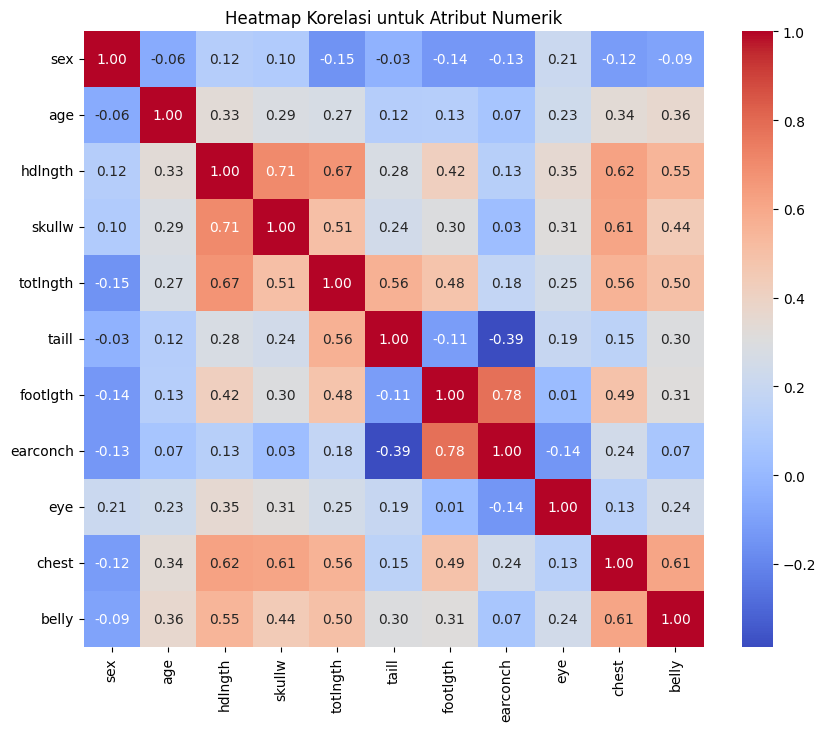

In [ ]:
# Korelasi Pearson
korelasi = df.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8)) #menampilkan visualisasi dengan ukuran 10*8
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f") #memilih warna visualisai
plt.title('Heatmap Korelasi untuk Atribut Numerik') # memberikan judul
plt.show() #menampilkan matriks korrelasi


Dari korelasi antar variabel yang sebelumnya kita analisis, selanjutnya dibuat matriks korelasi sehingga pengamatan terhadap korelasi dapat lebih mudah.

In [ ]:
df = df[['eye', 'hdlngth','sex']] # membuat dataframe baru dengan kolom 'eye', 'hdlngth' dan 'sex'
df.head(20) # menampilkan 20 data teratas

,eye,hdlngth,sex
0,15.2,94.1,1
1,16.0,92.5,0
2,15.5,94.0,0
3,15.2,93.2,0
4,15.1,91.5,0
5,14.2,93.1,0
6,14.2,95.3,1
7,14.5,94.8,0
8,15.5,93.4,0
9,14.4,91.8,0


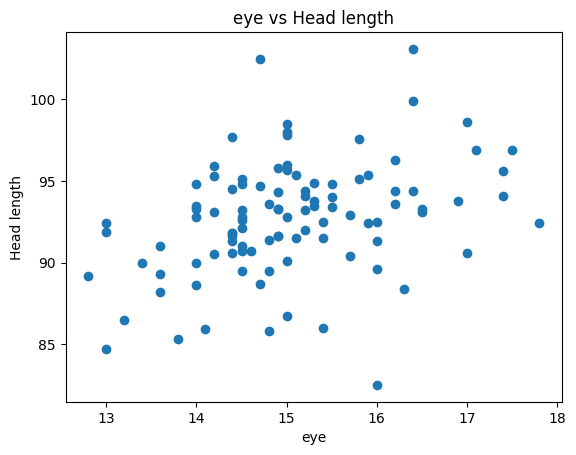

In [ ]:
plt.scatter(df['eye'], df['hdlngth']) # membuat scatter plot 'eye' dan juga 'hdlngth'
plt.title('eye vs Head length') # menambahkan judul
plt.xlabel('eye') #memberikan label x
plt.ylabel('Head length') # memberikan label y
plt.show() # menampilkan plot

Dari scatterplot kolom eye dan head length diatas, dapat dilihat bahwa semakin besar nilai eye maka nilai head length cenderung ikut naik.

## **Kernel Perceptron Modelling**

### **Split Train n Test Data**

In [ ]:
# Memilih features (variabel independen) dan target (variabel dependen) dari DataFrame 'df'
X = df.iloc[:, :-1].values  # Memilih semua kolom kecuali kolom terakhir
y = df.iloc[:, -1].values  # Memilih hanya kolom terakhir sebagai target

X = np.asarray(X,dtype=np.float) # mengubah tipe data ke float
y = np.asarray(y,dtype=np.float) # mengubah tipe data ke float

# membagi data 80% pelatihan dan 30% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# menampilkan nilai test dan train
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80, 2) (80,)
(21, 2) (21,)


<ipython-input-13-01bfc70e889c>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.asarray(X,dtype=np.float)
<ipython-input-13-01bfc70e889c>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.asarray(y,dtype=np.float)


### **Linear Kernel & Polynomial Kernel**

In [ ]:
# Fungsi Linear Kernel
def linear_kernel(X,Y): # Argumen input
    assert X.shape[1] == Y.shape[1]
    K = np.matmul(X,Y.T) # menghitung kernel dengan perkalian X dan transpose Y
    return K

# Fungsi Polynomial_kernel
def polynomial_kernel(X,Y,degree=2,gamma=None,a=1): # menggunakan X dan Y sebagai input
    assert X.shape[1] == Y.shape[1] # mengecek jumlah kolom
    if gamma is None:
        gamma = 1./X.shape[1]
    K = np.matmul(X,Y.T) # menghitung kernel polynomial dengan perkalian X dan transpose Y
    K *= gamma # kernel dengan nilai gamma
    K += a # menambahkan nilai konstan a ke setiap elemen kernel
    K **= degree # memangkatkan matriks ke derajat degree
    return K

### **Kernel Perceptron**

In [ ]:
# Fungsi Kernel Perception
def KernelPerceptron(X_train,y_train,X_test,y_test, max_iter=10, kernel='linear', degree=2,gamma=None,a=1):
    T = X_train.shape[0] # inisiasi jumlah data pelatihan 'T'
    alpha = np.zeros(T) # vektor alpha sebagai vektor nol dengan panjang T
    # Kernel Linear
    if kernel == 'linear':
        for it in range(max_iter):
            up = 0
            for t in range(T):
                X_t = np.reshape(X_train[t],(1,2))
                h = linear_kernel(X_train,X_t)
                y_t_hat = np.sign(np.matmul((alpha*y_train).T,h))
                if y_train[t] != y_t_hat:
                    alpha[t] += 1
                    up += 1
            print('iter:{},updates:{}'.format(it+1,up))
            # iterasi pelatihan dan update vektor alpha saat adanya salah prediksi
        h = linear_kernel(X_train,X_test)  # menghitung hasil prediksi pada data uji dan data pelatihan
        y_test_preds = np.sign(np.matmul((alpha*y_train).T,h))
        h = linear_kernel(X_train,X_train)
        y_train_preds = np.sign(np.matmul((alpha*y_train).T,h))

    elif kernel == 'poly': # kernel polynomial
        for it in range(max_iter):
            up = 0
            for t in range(T):
                X_t = np.reshape(X_train[t],(1,2))
                h = polynomial_kernel(X_train,X_t,degree=degree,gamma=gamma,a=a)
                y_t_hat = np.sign(np.matmul((alpha*y_train).T,h))
                if y_train[t] != y_t_hat:
                    alpha[t] += 1
                    up += 1
            print('iter:{},updates:{}'.format(it+1,up))
            # iterasi pelatihan dan update vektor alpha saat adanya salah prediksi
             # menghitung hasil prediksi pada data uji dan data pelatihan
        h = polynomial_kernel(X_train,X_test,degree=degree,gamma=gamma,a=a)
        y_test_preds = np.sign(np.matmul((alpha*y_train).T,h))
        h = polynomial_kernel(X_train,X_train,degree=degree,gamma=gamma,a=a)
        y_train_preds = np.sign(np.matmul((alpha*y_train).T,h))
    else:
        print('Invalid Kernel !')
        return
  # Mengembalikan vektor alpha, akurasi pengujian, akurasi pelatihan, dan parameter kernel
    return alpha, np.mean(y_test == y_test_preds), np.mean(y_train == y_train_preds), [degree, gamma, a]

# Fungsi predict_poly dan predict_linear
# membuat prediksi berdasarkan model yang telah dilatih, dengan menggunakan kernel polynomial atau linear.
def predict_poly(alpha,X,Y,y,degree=2,gamma=None,a=1):
    h = polynomial_kernel(X,Y,degree=degree,gamma=gamma,a=a)
    return np.sign(np.matmul((alpha*y).T,h))

def predict_linear(alpha,X,Y,y):
    h = linear_kernel(X,Y)
    return np.sign(np.matmul((alpha*y).T,h))

# fungsi predict
# memanggil prediksi dengan jenis kernel yang diinginkan
def predict(alpha,X,Y,y,kernel='linear',degree=2,gamma=None,a=1):
    if kernel == 'linear':
        return predict_linear(alpha,X,Y,y)
    elif kernel == 'poly':
        return predict_poly(alpha,X,Y,y,degree=degree,gamma=gamma,a=a)
    else:
        print('Invalid Kernel !')
        return

kernel = 'linear'
alpha,te_acc,tr_acc,params = KernelPerceptron(X_train,y_train,X_test,y_test,max_iter=100,kernel=kernel,degree=3)
print('test accuracy: {}, train accuracy: {}'.format(te_acc,tr_acc))

iter:1,updates:36
iter:2,updates:35
iter:3,updates:35
iter:4,updates:35
iter:5,updates:35
iter:6,updates:35
iter:7,updates:35
iter:8,updates:35
iter:9,updates:35
iter:10,updates:35
iter:11,updates:35
iter:12,updates:35
iter:13,updates:35
iter:14,updates:35
iter:15,updates:35
iter:16,updates:35
iter:17,updates:35
iter:18,updates:35
iter:19,updates:35
iter:20,updates:35
iter:21,updates:35
iter:22,updates:35
iter:23,updates:35
iter:24,updates:35
iter:25,updates:35
iter:26,updates:35
iter:27,updates:35
iter:28,updates:35
iter:29,updates:35
iter:30,updates:35
iter:31,updates:35
iter:32,updates:35
iter:33,updates:35
iter:34,updates:35
iter:35,updates:35
iter:36,updates:35
iter:37,updates:35
iter:38,updates:35
iter:39,updates:35
iter:40,updates:35
iter:41,updates:35
iter:42,updates:35
iter:43,updates:35
iter:44,updates:35
iter:45,updates:35
iter:46,updates:35
iter:47,updates:35
iter:48,updates:35
iter:49,updates:35
iter:50,updates:35
iter:51,updates:35
iter:52,updates:35
iter:53,updates:35
it

### **Linear SVM Classification and Model Analysis**

In [ ]:
## Tes AKurasi
# mengecek akurasi dari data pengujian dan data test
R = np.linalg.norm(X_train,axis=1).max()
clf = SVC(kernel='linear',C=1000,degree=3)
clf.fit(X_train, y_train)

# menampilkan akurasi
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Test Accuracy: {clf.score(X_test, y_test)}')

w = clf.coef_
w1 = w/np.linalg.norm(w)
gamma = (y_train*np.matmul(w1,X_train.T)).min()

Train Accuracy: 0.55
Test Accuracy: 0.5714285714285714


## Visualisasi Hasil

### Fungsi Visual

In [ ]:
dataset = 1
def make_meshgrid(x, y, dataset=3):
  # menetapkan nilai h berdasarkan dataset
    h = 0.02 if dataset == 3 else 0.75
    # menghitung batas-batas plot untuk sumbu x dan y berdasarkan nilai minimum dan maximum
    x_min, x_max = x.min() - 25 * h, x.max() + 25 * h
    y_min, y_max = y.min() - 25 * h, y.max() + 25 * h
    # membuat meshgrid dari rentang nilai x dan y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #mengembalikan meshgrid ke fungsi x dan y
    return xx, yy

# menggabungkan nilai-nilai xx dan yy kedalam satu array
def plot_contours(ax, alpha_, X_train, y, xx, yy, kernel='linear', degree=2, gamma=None, a=1, **params):
    X = np.c_[xx.ravel(), yy.ravel()]
    # memperoleh prediksi model yang sudah dilatih
    Z = predict(alpha_, X_train, X, y, kernel=kernel, degree=degree, gamma=gamma, a=a)
    # mengubah bentuk array sehingga sesuai dengan meshgrid
    Z = Z.reshape(xx.shape)
    membuat plot kontour
    out = ax.contourf(xx, yy, Z, **params)
    return out


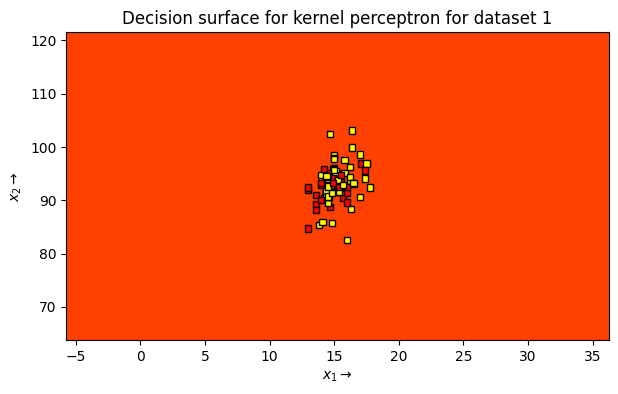

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

# Ambil fitur dari data pelatihan
X0, X1 = X_train[:, 0], X_train[:, 1]

# Buat meshgrid untuk plotting
xx, yy = make_meshgrid(X0, X1, dataset=dataset)

# Ambil parameter-degree, gamma, dan a
degree, gamma, a = params

# Plot decision surface dan contour plot
plot_contours(ax, alpha_=alpha, X_train=X_train,
              y=y_train, xx=xx, yy=yy,
              kernel=kernel, degree=degree,
              gamma=gamma, a=a,
              cmap=plt.cm.autumn, alpha=1)

# Scatter plot untuk data pelatihan
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.autumn, s=20, edgecolors='k', marker='s')

# Label sumbu dan judul plot
ax.set_ylabel(r'$x_2\rightarrow$')
ax.set_xlabel(r'$x_1\rightarrow$')
ax.set_title('Decision surface for kernel perceptron for dataset 1')

# Tampilkan plot
plt.show()
